# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [6]:
sum(websites.isna().any(axis=1))/len(websites.index)

0.6428972487366648

In [7]:
# Your comment here
'''For numeric features we will choose all except content lenght (that has to many nulls )for our training set. Categorical features we will one hot encode those with not tooo many categories'''

'For numeric features we will choose all except content lenght (that has to many nulls )for our training set. Categorical features we will one hot encode those with not tooo many categories'

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

Text(0.5, 1.0, 'Correlation Heatmap')

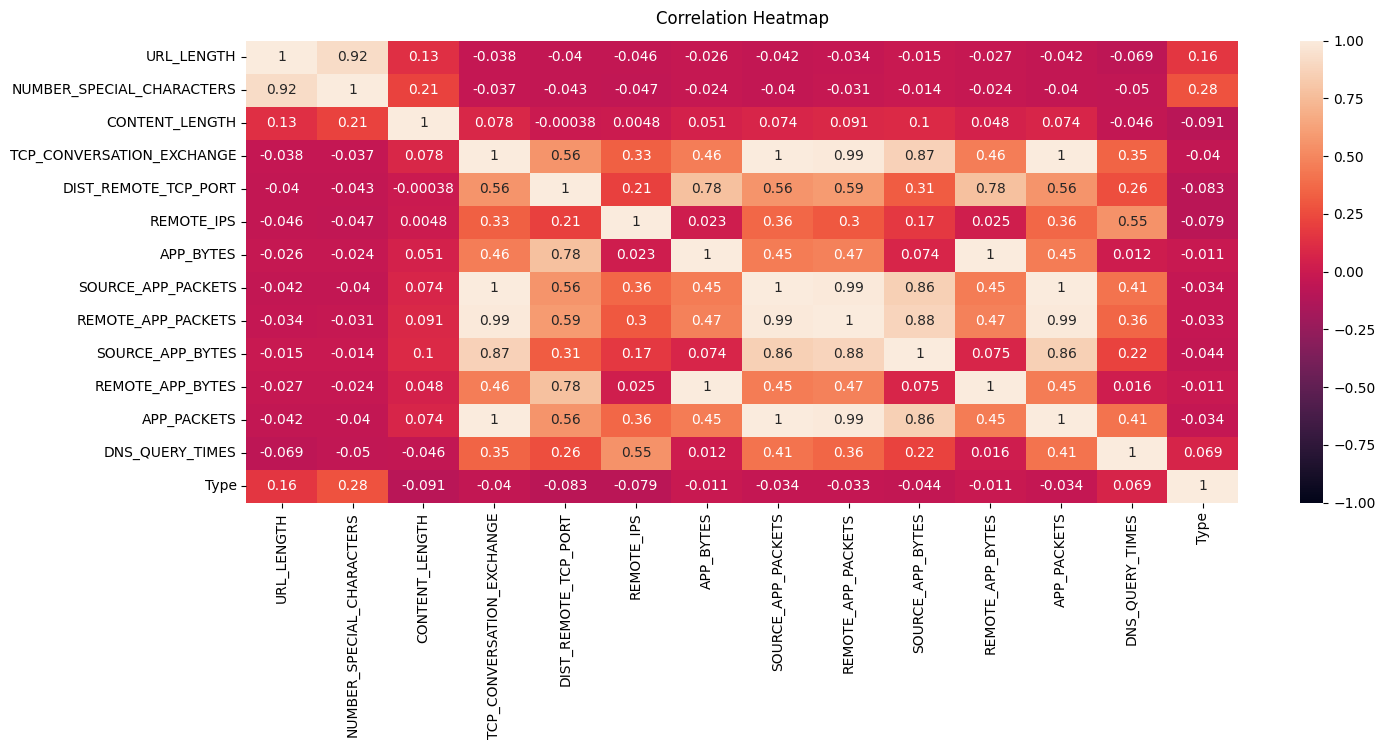

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(websites.select_dtypes(exclude='object').corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [9]:
# Your comment here
'''If we remove REMOTE_APP_PACKETS, APP_PACKETS, REMOTE_APP_BYTES, TCP_CONVERSATION_EXCHANGE and NUMBER_SPECIAL_CHARACTERS we eliminate most of the top correlations'''

'If we remove REMOTE_APP_PACKETS, APP_PACKETS, REMOTE_APP_BYTES, TCP_CONVERSATION_EXCHANGE and NUMBER_SPECIAL_CHARACTERS we eliminate most of the top correlations'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [10]:
# Your code here
websites.drop(["REMOTE_APP_PACKETS", "APP_PACKETS","TCP_CONVERSATION_EXCHANGE", "REMOTE_APP_BYTES", "NUMBER_SPECIAL_CHARACTERS"], axis=1, inplace=True)


In [11]:
# Your comment here

Text(0.5, 1.0, 'Correlation Heatmap')

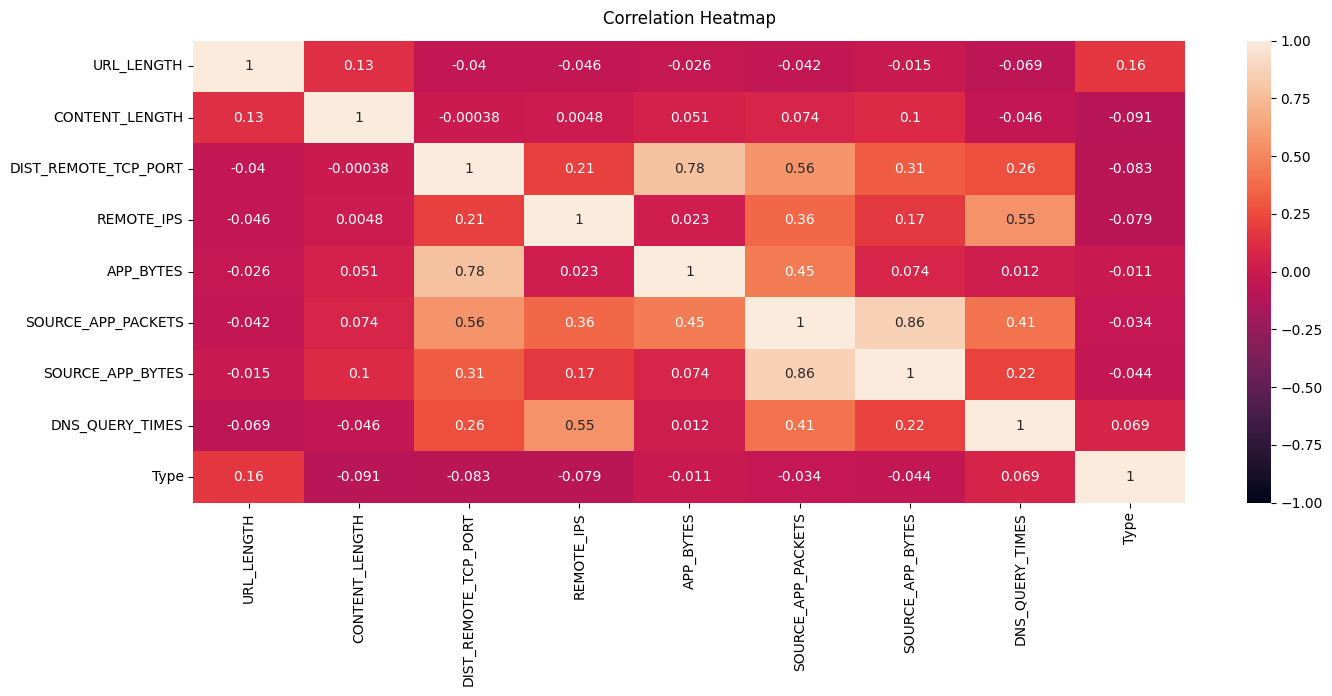

In [12]:
# Print heatmap again
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(websites.select_dtypes(exclude='object').corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [13]:
# Your code here
sum(websites.isna().any(axis=1))/len(websites.index)

0.6428972487366648

In [14]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1781 non-null   object 
 1   URL_LENGTH            1781 non-null   int64  
 2   CHARSET               1774 non-null   object 
 3   SERVER                1605 non-null   object 
 4   CONTENT_LENGTH        969 non-null    float64
 5   WHOIS_COUNTRY         1475 non-null   object 
 6   WHOIS_STATEPRO        1419 non-null   object 
 7   WHOIS_REGDATE         1654 non-null   object 
 8   WHOIS_UPDATED_DATE    1642 non-null   object 
 9   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 10  REMOTE_IPS            1781 non-null   int64  
 11  APP_BYTES             1781 non-null   int64  
 12  SOURCE_APP_PACKETS    1781 non-null   int64  
 13  SOURCE_APP_BYTES      1781 non-null   int64  
 14  DNS_QUERY_TIMES       1780 non-null   float64
 15  Type                 

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
# Your code here
websites.drop('CONTENT_LENGTH', axis=1, inplace=True)


In [16]:
sum(websites.isna().any(axis=1))/len(websites.index)

0.29421673217293653

In [17]:
websites.dropna(inplace=True)

In [18]:
# Your comment here
'''content length has a excesive number of nulls so is better to delete it for the rest we will drop the rows with mising values'''

'content length has a excesive number of nulls so is better to delete it for the rest we will drop the rows with mising values'

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [19]:
# Examine missing values in each column
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1257 non-null   object 
 1   URL_LENGTH            1257 non-null   int64  
 2   CHARSET               1257 non-null   object 
 3   SERVER                1257 non-null   object 
 4   WHOIS_COUNTRY         1257 non-null   object 
 5   WHOIS_STATEPRO        1257 non-null   object 
 6   WHOIS_REGDATE         1257 non-null   object 
 7   WHOIS_UPDATED_DATE    1257 non-null   object 
 8   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 9   REMOTE_IPS            1257 non-null   int64  
 10  APP_BYTES             1257 non-null   int64  
 11  SOURCE_APP_PACKETS    1257 non-null   int64  
 12  SOURCE_APP_BYTES      1257 non-null   int64  
 13  DNS_QUERY_TIMES       1257 non-null   float64
 14  Type                  1257 non-null   int64  
dtypes: float64(1), int64(7), o

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [20]:
consolidated = websites
consolidated['WHOIS_COUNTRY'].describe()

count     1257
unique      40
top         US
freq       957
Name: WHOIS_COUNTRY, dtype: object

In [21]:
def consolidate(x):
    if x in ['CY', 'Cyprus']:
        return 'CY'
    if x in ['GB', 'United Kingdom', "[u'GB'; u'UK']"]:
        return 'GB'
    else:
        return x.upper()
    

In [22]:
consolidated['WHOIS_COUNTRY'] = consolidated.apply(lambda x: consolidate(x['WHOIS_COUNTRY']), axis=1)

In [23]:
consolidated['WHOIS_COUNTRY'].describe()

count     1257
unique      37
top         US
freq       960
Name: WHOIS_COUNTRY, dtype: object

In [24]:
# Your code here


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [25]:
# Your code here
cols_to_onehot = []
cols_to_transform =[]
cols_to_drop = ['CONTENT_LENGTH']
for col in websites.select_dtypes(include='object').columns:
    print(f'{col} has {len(websites[col].unique())} unique values')
    if len(websites[col].unique()) < 10:
        cols_to_onehot.append(col)
    elif len(websites[col].unique()) < 50:
        cols_to_transform.append(col)
    else:
        cols_to_drop.append(col)
print(cols_to_onehot)
print(cols_to_transform)
cols_to_drop

URL has 1257 unique values
CHARSET has 7 unique values
SERVER has 193 unique values
WHOIS_COUNTRY has 37 unique values
WHOIS_STATEPRO has 173 unique values
WHOIS_REGDATE has 679 unique values
WHOIS_UPDATED_DATE has 486 unique values
['CHARSET']
['WHOIS_COUNTRY']


['CONTENT_LENGTH',
 'URL',
 'SERVER',
 'WHOIS_STATEPRO',
 'WHOIS_REGDATE',
 'WHOIS_UPDATED_DATE']

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [26]:
# Your code here
top_countries = consolidated['WHOIS_COUNTRY'].value_counts()[:10].index.tolist()
def relabel(x):
    if x in top_countries:
        return x
    else:
        return 'OTHER'

In [27]:
top_countries

['US', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'IN', 'CN', 'CZ']

In [28]:
consolidated['WHOIS_COUNTRY'] = consolidated['WHOIS_COUNTRY'].apply(relabel)
consolidated['WHOIS_COUNTRY'].unique()

array(['US', 'OTHER', 'AU', 'CA', 'PA', 'IN', 'GB', 'JP', 'CN', 'CZ',
       'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [29]:
# Your code here
consolidated.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [30]:
# Your code here
consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1257 non-null   object 
 1   URL_LENGTH            1257 non-null   int64  
 2   CHARSET               1257 non-null   object 
 3   SERVER                1257 non-null   object 
 4   WHOIS_COUNTRY         1257 non-null   object 
 5   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 6   REMOTE_IPS            1257 non-null   int64  
 7   APP_BYTES             1257 non-null   int64  
 8   SOURCE_APP_PACKETS    1257 non-null   int64  
 9   SOURCE_APP_BYTES      1257 non-null   int64  
 10  DNS_QUERY_TIMES       1257 non-null   float64
 11  Type                  1257 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 127.7+ KB


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [31]:
# Your code hereW
consolidated.drop(['URL'], axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [32]:
# Your code here
consolidated['CHARSET'].value_counts()

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [33]:
# Your code here
consolidated['SERVER'].value_counts()

SERVER
Apache                                                                                311
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

In [34]:
top_servers = consolidated['SERVER'].value_counts()[:3].index.tolist()
def relabel_server(x):
    if x in top_servers:
        return x
    else:
        return 'OTHER'

In [35]:
consolidated['SERVER'] = consolidated['SERVER'].apply(relabel_server)
consolidated['SERVER'].unique()

array(['nginx', 'OTHER', 'Apache', 'cloudflare-nginx'], dtype=object)

![Think Hard](../images/think-hard.jpg)

In [36]:
# Your comment here
'''I applied the same strategy than with the country column and reatained the 10 most common values and relabel the rest as other'''

'I applied the same strategy than with the country column and reatained the 10 most common values and relabel the rest as other'

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [51]:
# Your code here
consolidated['SERVER'].unique()


array(['nginx', 'OTHER', 'Apache', 'cloudflare-nginx'], dtype=object)

In [52]:
# Count `SERVER` value counts here
consolidated['SERVER'].value_counts()

SERVER
OTHER               722
Apache              311
nginx               144
cloudflare-nginx     80
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [56]:
# Your code here
websites_dummy = pd.concat([consolidated.select_dtypes(exclude='object'), pd.get_dummies(consolidated.select_dtypes(include='object'), drop_first=True)],axis = 1)
websites_dummy

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,CHARSET_iso-8859-1,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,22,3,3812,39,18784,8.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
5,18,6,9,894,11,838,0.0,0,True,False,...,False,False,False,False,False,False,False,True,False,False
6,18,0,3,1189,14,8559,2.0,0,False,True,...,False,False,False,False,False,False,False,False,False,True
7,19,0,0,0,0,0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
10,20,0,0,0,0,0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,0,0,0,0,186,0.0,1,True,False,...,False,False,False,True,False,False,False,False,False,False
1777,198,0,0,0,0,124,0.0,1,True,False,...,False,False,False,True,False,False,False,False,False,False
1778,201,2,6,6631,87,132181,4.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1779,234,0,0,0,0,0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [57]:
# Your code here
websites_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URL_LENGTH               1257 non-null   int64  
 1   DIST_REMOTE_TCP_PORT     1257 non-null   int64  
 2   REMOTE_IPS               1257 non-null   int64  
 3   APP_BYTES                1257 non-null   int64  
 4   SOURCE_APP_PACKETS       1257 non-null   int64  
 5   SOURCE_APP_BYTES         1257 non-null   int64  
 6   DNS_QUERY_TIMES          1257 non-null   float64
 7   Type                     1257 non-null   int64  
 8   CHARSET_UTF-8            1257 non-null   bool   
 9   CHARSET_iso-8859-1       1257 non-null   bool   
 10  CHARSET_us-ascii         1257 non-null   bool   
 11  CHARSET_utf-8            1257 non-null   bool   
 12  CHARSET_windows-1251     1257 non-null   bool   
 13  CHARSET_windows-1252     1257 non-null   bool   
 14  SERVER_OTHER             1257

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [58]:
from sklearn.model_selection import train_test_split

# Your code here:
X= websites_dummy.drop('Type', axis=1)
y = websites_dummy['Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [62]:
# Your code here:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

logreg = LogisticRegression()




Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [64]:
# Your code here:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform( X_test)
logreg.fit(X_train_std,y_train)


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [66]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, logreg.predict(X_test_std)))
confusion_matrix(y_test, logreg.predict(X_test_std))


0.9404761904761905


array([[221,   3],
       [ 12,  16]], dtype=int64)

What are your thoughts on the performance of the model? Write your conclusions below.

In [45]:
# Your conclusions here:
'''Because the target is unbalance the model tends to give priority to majority group,
 in this case bening websites, so it detects correctly bening websites but has low sensitivity to harmfull websites'''


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [68]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [71]:
# Your code here:
knn.fit(X_train,y_train)
print(accuracy_score(y_test, knn.predict(X_test)))
confusion_matrix(y_test, knn.predict(X_test))


0.9484126984126984


array([[222,   2],
       [ 11,  17]], dtype=int64)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [73]:
# Your code here:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train,y_train)
print(accuracy_score(y_test, knn5.predict(X_test)))
confusion_matrix(y_test, knn5.predict(X_test))

0.9484126984126984


array([[222,   2],
       [ 11,  17]], dtype=int64)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [49]:
# Your conclusions here:
'''the results where exactly the same'''


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [76]:
# Your code here
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
logreg2 = LogisticRegression()
X_train_rob = rob_scaler.fit_transform(X_train)
X_test_rob = rob_scaler.fit_transform( X_test)
logreg2.fit(X_train_rob,y_train)

LogisticRegression()

In [78]:
print(accuracy_score(y_test, logreg2.predict(X_test_rob)))
confusion_matrix(y_test, logreg2.predict(X_test_rob))

0.9325396825396826


array([[223,   1],
       [ 16,  12]], dtype=int64)

In [79]:
rob_scaler = RobustScaler()
knn_rob = KNeighborsClassifier()
knn_rob.fit(X_train_rob,y_train)

KNeighborsClassifier()

In [80]:
print(accuracy_score(y_test, knn_rob.predict(X_test_rob)))
confusion_matrix(y_test, knn_rob.predict(X_test_rob))

0.9523809523809523


array([[220,   4],
       [  8,  20]], dtype=int64)

In [ ]:
'''the accuracity has improved for both models, although for linear regression i had already used standardscaler'''